In [ ]:
# Uncomment the line corresponding to your "runtime type" to run in Google Colab

# CPU:
# !pip install pydub torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# GPU:
# !pip install pydub torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

  0%|          | 0.00/2.26G [00:00<?, ?B/s]

In [ ]:
train_set[0]

(tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]),
 16000,
 'backward',
 '0165e0e8',
 0)

In [ ]:
print(len(train_set))
print(len(test_set))

84843
11005


In [ ]:
Train_File = open("/content/drive/MyDrive/train_list.txt", "r")

# reading the file
data = Train_File.read()

Train_list = data.split("\n")

# printing the data
print(Train_list)

j=0
TrainNew=[]
for i, val in enumerate(train_set):
    if Train_list[j]!='' and int(Train_list[j])==i:
        TrainNew.append(val)
        j=j+1

['3', '9', '15', '22', '25', '28', '34', '43', '62', '74', '84', '86', '88', '90', '91', '92', '98', '100', '102', '108', '112', '116', '120', '121', '122', '133', '135', '142', '153', '157', '158', '159', '174', '179', '184', '185', '214', '238', '239', '255', '276', '284', '289', '295', '298', '303', '307', '308', '313', '318', '334', '343', '356', '363', '387', '392', '397', '408', '427', '432', '448', '454', '455', '462', '476', '484', '486', '506', '512', '520', '523', '527', '530', '531', '536', '549', '550', '559', '568', '572', '578', '579', '581', '592', '605', '609', '613', '617', '623', '628', '647', '648', '663', '664', '670', '676', '679', '688', '691', '701', '725', '729', '730', '741', '750', '754', '759', '760', '762', '777', '778', '783', '786', '788', '790', '795', '815', '817', '819', '824', '825', '830', '870', '885', '889', '912', '918', '926', '933', '941', '949', '953', '972', '992', '994', '1002', '1009', '1011', '1015', '1019', '1023', '1024', '1036', '1040', '

In [ ]:

print(len(TrainNew))

12000


In [ ]:
Test_File = open("/content/drive/MyDrive/test_list.txt", "r")

# reading the file
data = Test_File.read()

# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
Test_list = data.split("\n")

# printing the data
print(Test_list)

j=0
TestNew=[]
for i, val in enumerate(test_set):
    if Test_list[j]!='' and int(Test_list[j])==i:
        TestNew.append(val)
        j=j+1

['7', '8', '9', '10', '17', '22', '25', '26', '28', '33', '39', '40', '42', '44', '45', '46', '50', '52', '54', '57', '58', '62', '63', '64', '68', '69', '70', '72', '76', '77', '85', '89', '90', '93', '96', '97', '100', '104', '105', '107', '112', '123', '126', '128', '129', '135', '139', '140', '150', '152', '154', '157', '158', '159', '161', '162', '166', '167', '174', '176', '179', '180', '191', '196', '197', '203', '204', '209', '213', '216', '218', '224', '228', '230', '236', '238', '240', '242', '244', '245', '248', '252', '254', '261', '262', '264', '268', '269', '272', '273', '274', '278', '280', '283', '287', '290', '293', '296', '298', '301', '309', '312', '314', '320', '327', '329', '332', '335', '336', '337', '338', '339', '341', '352', '353', '354', '357', '358', '360', '362', '363', '365', '367', '372', '374', '378', '379', '383', '387', '389', '390', '392', '394', '395', '397', '398', '399', '403', '407', '408', '410', '411', '414', '415', '416', '417', '420', '423', '4

In [ ]:
print(len(TestNew))


4000


Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


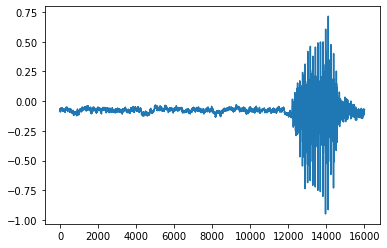

In [ ]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

In [ ]:
labels = sorted(list(set(datapoint[2] for datapoint in TrainNew)))
labels


['backward',
 'bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'follow',
 'forward',
 'four',
 'go',
 'happy',
 'house',
 'learn',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'visual',
 'wow',
 'yes',
 'zero']

In [ ]:
waveform_first, *_ = TrainNew[0]
ipd.Audio(waveform_first.numpy(), rate=sample_rate)

waveform_second, *_ = TrainNew[1]
ipd.Audio(waveform_second.numpy(), rate=sample_rate)

In [ ]:
waveform_last, *_ = train_set[-1]
ipd.Audio(waveform_last.numpy(), rate=sample_rate)

In [ ]:
waveform_last, *_ = TrainNew[-1]
ipd.Audio(waveform_last.numpy(), rate=sample_rate)

In [ ]:
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(waveform)

ipd.Audio(transformed.numpy(), rate=new_sample_rate)

In [ ]:
def label_to_index(word):
    # Return the position of the word in labels
    return torch.tensor(labels.index(word))


def index_to_label(index):
    # Return the word corresponding to the index in labels
    # This is the inverse of label_to_index
    return labels[index]


word_start = "yes"
index = label_to_index(word_start)
word_recovered = index_to_label(index)

print(word_start, "-->", index, "-->", word_recovered)

yes --> tensor(33) --> yes


In [ ]:
def pad_sequence(batch):
    # Make all tensor in a batch the same length by padding with zeros
    batch = [item.t() for item in batch]
    batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
    return batch.permute(0, 2, 1)


def collate_fn(batch):

    # A data tuple has the form:
    # waveform, sample_rate, label, speaker_id, utterance_number

    tensors, targets = [], []

    # Gather in lists, and encode labels as indices
    for waveform, _, label, *_ in batch:
        tensors += [waveform]
        targets += [label_to_index(label)]

    # Group the list of tensors into a batched tensor
    tensors = pad_sequence(tensors)
    targets = torch.stack(targets)

    return tensors, targets


batch_size = 256

if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

train_loader = torch.utils.data.DataLoader(
    TrainNew,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    TestNew,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

In [ ]:
class M5(nn.Module):
    def __init__(self, n_input=1, n_output=35, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(2 * n_channel, n_output)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=2)


model = M5(n_input=transformed.shape[0], n_output=len(labels))
model.to(device)
print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


n = count_parameters(model)
print("Number of parameters: %s" % n)

M5(
  (conv1): Conv1d(1, 32, kernel_size=(80,), stride=(16,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 32, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=35, bias=True)
)
Numbe

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

In [ ]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)
        # print("out------",output)
        # print("size----",output.shape)
        # negative log-likelihood for a tensor of size (batch x 1 x n_output)
        loss = F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        # update progress bar
        pbar.update(pbar_update)
        # record loss
        losses.append(loss.item())

In [ ]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

In [ ]:
log_interval = 20
n_epoch = 20

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

# The transform needs to live on the same device as the model and the data.
transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train(model, epoch, log_interval)
        test(model, epoch)
        scheduler.step()

# Let's plot the training loss versus the number of iteration.
# plt.plot(losses);
# plt.title("training loss");

  1%|          | 0.14285714285714285/20 [00:00<00:30,  1.56s/it]

Train Epoch: 1 [0/12000 (0%)]	Loss: 0.206170


  2%|▏         | 0.42857142857142855/20 [00:00<00:32,  1.67s/it]

Train Epoch: 1 [5120/12000 (43%)]	Loss: 0.258609


  4%|▎         | 0.7460317460317452/20 [00:01<00:36,  1.89s/it]

Train Epoch: 1 [10240/12000 (85%)]	Loss: 0.222350


  6%|▌         | 1.111111111111109/20 [00:01<00:25,  1.33s/it] 


Test Epoch: 1	Accuracy: 2944/4000 (74%)

Train Epoch: 2 [0/12000 (0%)]	Loss: 0.193716


  7%|▋         | 1.444444444444441/20 [00:02<00:23,  1.28s/it] 

Train Epoch: 2 [5120/12000 (43%)]	Loss: 0.217709


  9%|▊         | 1.7301587301587258/20 [00:02<00:22,  1.24s/it]

Train Epoch: 2 [10240/12000 (85%)]	Loss: 0.281778


 11%|█         | 2.126984126984121/20 [00:03<00:21,  1.23s/it] 


Test Epoch: 2	Accuracy: 2941/4000 (74%)

Train Epoch: 3 [0/12000 (0%)]	Loss: 0.186071


 12%|█▏        | 2.4603174603174534/20 [00:03<00:24,  1.37s/it]

Train Epoch: 3 [5120/12000 (43%)]	Loss: 0.183084


 14%|█▍        | 2.7777777777777697/20 [00:03<00:23,  1.34s/it]

Train Epoch: 3 [10240/12000 (85%)]	Loss: 0.258993


 15%|█▌        | 3.095238095238086/20 [00:04<00:21,  1.28s/it]


Test Epoch: 3	Accuracy: 2931/4000 (73%)

Train Epoch: 4 [0/12000 (0%)]	Loss: 0.179181


 17%|█▋        | 3.428571428571418/20 [00:04<00:22,  1.38s/it]

Train Epoch: 4 [5120/12000 (43%)]	Loss: 0.204407


 19%|█▊        | 3.7460317460317345/20 [00:05<00:22,  1.38s/it]

Train Epoch: 4 [10240/12000 (85%)]	Loss: 0.242232


 21%|██        | 4.126984126984114/20 [00:05<00:20,  1.32s/it]


Test Epoch: 4	Accuracy: 2931/4000 (73%)

Train Epoch: 5 [0/12000 (0%)]	Loss: 0.203653


 22%|██▏       | 4.44444444444443/20 [00:06<00:20,  1.32s/it] 

Train Epoch: 5 [5120/12000 (43%)]	Loss: 0.269201


 24%|██▍       | 4.793650793650778/20 [00:06<00:18,  1.23s/it] 

Train Epoch: 5 [10240/12000 (85%)]	Loss: 0.190862


 26%|██▌       | 5.1269841269841105/20 [00:06<00:16,  1.11s/it]


Test Epoch: 5	Accuracy: 2947/4000 (74%)

Train Epoch: 6 [0/12000 (0%)]	Loss: 0.191969


 27%|██▋       | 5.412698412698395/20 [00:07<00:17,  1.18s/it]

Train Epoch: 6 [5120/12000 (43%)]	Loss: 0.160663


 29%|██▉       | 5.793650793650775/20 [00:07<00:16,  1.16s/it]

Train Epoch: 6 [10240/12000 (85%)]	Loss: 0.254976


 31%|███       | 6.142857142857123/20 [00:07<00:14,  1.05s/it]


Test Epoch: 6	Accuracy: 2949/4000 (74%)

Train Epoch: 7 [0/12000 (0%)]	Loss: 0.172472


 32%|███▏      | 6.444444444444423/20 [00:08<00:15,  1.11s/it]

Train Epoch: 7 [5120/12000 (43%)]	Loss: 0.188229


 34%|███▍      | 6.841269841269819/20 [00:08<00:14,  1.07s/it]

Train Epoch: 7 [10240/12000 (85%)]	Loss: 0.208337


 35%|███▌      | 7.095238095238072/20 [00:09<00:13,  1.01s/it]


Test Epoch: 7	Accuracy: 2948/4000 (74%)

Train Epoch: 8 [0/12000 (0%)]	Loss: 0.258067


 38%|███▊      | 7.507936507936483/20 [00:09<00:13,  1.10s/it]

Train Epoch: 8 [5120/12000 (43%)]	Loss: 0.202790


 39%|███▉      | 7.8095238095237836/20 [00:09<00:13,  1.08s/it]

Train Epoch: 8 [10240/12000 (85%)]	Loss: 0.169666


 41%|████      | 8.158730158730132/20 [00:10<00:12,  1.05s/it]


Test Epoch: 8	Accuracy: 2958/4000 (74%)

Train Epoch: 9 [0/12000 (0%)]	Loss: 0.263048


 42%|████▏     | 8.460317460317432/20 [00:10<00:12,  1.12s/it]

Train Epoch: 9 [5120/12000 (43%)]	Loss: 0.199214


 44%|████▎     | 8.746031746031717/20 [00:10<00:12,  1.14s/it]

Train Epoch: 9 [10240/12000 (85%)]	Loss: 0.169490


 46%|████▌     | 9.126984126984096/20 [00:11<00:11,  1.04s/it]


Test Epoch: 9	Accuracy: 2946/4000 (74%)

Train Epoch: 10 [0/12000 (0%)]	Loss: 0.189695


 47%|████▋     | 9.428571428571397/20 [00:11<00:11,  1.13s/it]

Train Epoch: 10 [5120/12000 (43%)]	Loss: 0.204986


 49%|████▉     | 9.825396825396792/20 [00:11<00:10,  1.08s/it]

Train Epoch: 10 [10240/12000 (85%)]	Loss: 0.206774


 50%|█████     | 10.06349206349203/20 [00:12<00:10,  1.01s/it]


Test Epoch: 10	Accuracy: 2951/4000 (74%)

Train Epoch: 11 [0/12000 (0%)]	Loss: 0.199309


 52%|█████▏    | 10.47619047619044/20 [00:12<00:10,  1.11s/it] 

Train Epoch: 11 [5120/12000 (43%)]	Loss: 0.198525


 54%|█████▍    | 10.761904761904725/20 [00:12<00:10,  1.14s/it]

Train Epoch: 11 [10240/12000 (85%)]	Loss: 0.234466


 56%|█████▌    | 11.12698412698409/20 [00:13<00:09,  1.04s/it] 


Test Epoch: 11	Accuracy: 2950/4000 (74%)

Train Epoch: 12 [0/12000 (0%)]	Loss: 0.175424


 57%|█████▋    | 11.42857142857139/20 [00:13<00:09,  1.10s/it] 

Train Epoch: 12 [5120/12000 (43%)]	Loss: 0.190438


 59%|█████▉    | 11.825396825396785/20 [00:14<00:08,  1.07s/it]

Train Epoch: 12 [10240/12000 (85%)]	Loss: 0.217236


 60%|██████    | 12.063492063492022/20 [00:14<00:07,  1.01it/s]


Test Epoch: 12	Accuracy: 2948/4000 (74%)

Train Epoch: 13 [0/12000 (0%)]	Loss: 0.197673


 62%|██████▏   | 12.476190476190434/20 [00:14<00:08,  1.09s/it]

Train Epoch: 13 [5120/12000 (43%)]	Loss: 0.185627


 64%|██████▍   | 12.761904761904718/20 [00:15<00:08,  1.11s/it]

Train Epoch: 13 [10240/12000 (85%)]	Loss: 0.189610


 66%|██████▌   | 13.126984126984082/20 [00:15<00:07,  1.04s/it]


Test Epoch: 13	Accuracy: 2955/4000 (74%)

Train Epoch: 14 [0/12000 (0%)]	Loss: 0.175839


 67%|██████▋   | 13.428571428571383/20 [00:15<00:07,  1.09s/it]

Train Epoch: 14 [5120/12000 (43%)]	Loss: 0.217143


 69%|██████▊   | 13.714285714285667/20 [00:16<00:07,  1.20s/it]

Train Epoch: 14 [10240/12000 (85%)]	Loss: 0.179659


 71%|███████   | 14.111111111111063/20 [00:16<00:07,  1.23s/it]


Test Epoch: 14	Accuracy: 2950/4000 (74%)

Train Epoch: 15 [0/12000 (0%)]	Loss: 0.182375


 72%|███████▏  | 14.46031746031741/20 [00:17<00:07,  1.32s/it] 

Train Epoch: 15 [5120/12000 (43%)]	Loss: 0.180765


 74%|███████▍  | 14.777777777777727/20 [00:17<00:07,  1.37s/it]

Train Epoch: 15 [10240/12000 (85%)]	Loss: 0.209614


 75%|███████▌  | 15.095238095238043/20 [00:17<00:05,  1.22s/it]


Test Epoch: 15	Accuracy: 2955/4000 (74%)

Train Epoch: 16 [0/12000 (0%)]	Loss: 0.251300


 77%|███████▋  | 15.460317460317407/20 [00:18<00:05,  1.30s/it]

Train Epoch: 16 [5120/12000 (43%)]	Loss: 0.185289


 79%|███████▉  | 15.777777777777724/20 [00:18<00:05,  1.34s/it]

Train Epoch: 16 [10240/12000 (85%)]	Loss: 0.159615


 80%|████████  | 16.09523809523804/20 [00:19<00:04,  1.27s/it] 


Test Epoch: 16	Accuracy: 2955/4000 (74%)

Train Epoch: 17 [0/12000 (0%)]	Loss: 0.171335


 82%|████████▏ | 16.428571428571374/20 [00:19<00:04,  1.32s/it]

Train Epoch: 17 [5120/12000 (43%)]	Loss: 0.129372


 84%|████████▍ | 16.809523809523753/20 [00:20<00:03,  1.15s/it]

Train Epoch: 17 [10240/12000 (85%)]	Loss: 0.138789


 86%|████████▌ | 17.1587301587301/20 [00:20<00:02,  1.05s/it] 


Test Epoch: 17	Accuracy: 2960/4000 (74%)

Train Epoch: 18 [0/12000 (0%)]	Loss: 0.169625


 87%|████████▋ | 17.460317460317402/20 [00:20<00:02,  1.12s/it]

Train Epoch: 18 [5120/12000 (43%)]	Loss: 0.132696


 89%|████████▊ | 17.746031746031687/20 [00:21<00:02,  1.13s/it]

Train Epoch: 18 [10240/12000 (85%)]	Loss: 0.148426


 91%|█████████ | 18.126984126984066/20 [00:21<00:01,  1.03s/it]


Test Epoch: 18	Accuracy: 2954/4000 (74%)

Train Epoch: 19 [0/12000 (0%)]	Loss: 0.142677


 92%|█████████▏| 18.428571428571367/20 [00:21<00:01,  1.09s/it]

Train Epoch: 19 [5120/12000 (43%)]	Loss: 0.157552


 94%|█████████▍| 18.809523809523746/20 [00:22<00:01,  1.10s/it]

Train Epoch: 19 [10240/12000 (85%)]	Loss: 0.169540


 96%|█████████▌| 19.158730158730094/20 [00:22<00:00,  1.04s/it]


Test Epoch: 19	Accuracy: 2953/4000 (74%)

Train Epoch: 20 [0/12000 (0%)]	Loss: 0.202613


 97%|█████████▋| 19.460317460317395/20 [00:22<00:00,  1.09s/it]

Train Epoch: 20 [5120/12000 (43%)]	Loss: 0.214683


 99%|█████████▊| 19.74603174603168/20 [00:23<00:00,  1.13s/it] 

Train Epoch: 20 [10240/12000 (85%)]	Loss: 0.160756


100%|█████████▉| 19.999999999999932/20 [00:23<00:00,  1.17s/it]


Test Epoch: 20	Accuracy: 2955/4000 (74%)

